In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [131]:
data1 = pd.read_csv("../data1.csv")
data2 = pd.read_csv("../data2.csv")
data = pd.concat([data1, data2], axis=0).reset_index()
data.head()
print(data.shape, data1.shape, data2.shape)
trueDataCols = ['r' + str(i) for i in range(1, 35)] + ['c1', 'c2'] + ['outside']

(4800, 56) (2400, 55) (2400, 55)


[-0.033125, -0.027916666666666666, -0.02666666666666667, -0.03375]
Bias: -0.030364583333333334
[0.03203440821004376, 0.027142981176634023, 0.02596096408974092, 0.0326177328610127]
Variance: 0.029439021584357853


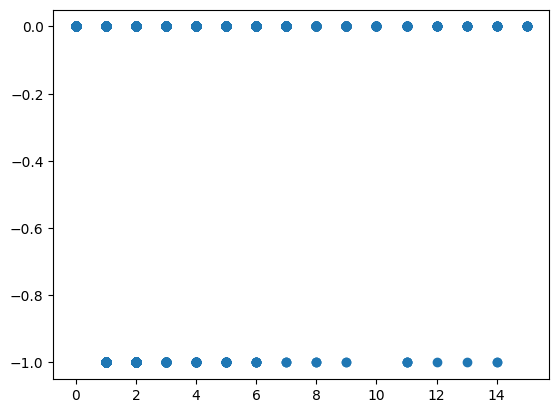

In [60]:
### Investigating the accuracy of the camera sensor
# We are going to assume the camera sensors are i.i.d estimators of the room's occupancy.
# From our initial investigation, they look to have statistically similar bias and variance.

# Camera 1 in room 3
# Camera 2 in room 21
# Camera 3 in room 25
# Camera 4 in room 34
cameras = pd.DataFrame(data[['camera1', 'r3', 'camera2', 'r21', 'camera3', 'r25', 'camera4', 'r34', 'time']])

cameras['err1'] = cameras['camera1'] - cameras['r3']
cameras['err2'] = cameras['camera2'] - cameras['r21']
cameras['err3'] = cameras['camera3'] - cameras['r25']
cameras['err4'] = cameras['camera4'] - cameras['r34']

# Slighly biased towards showing a smaller number
meanErrors = [
    cameras['err1'].mean(),
    cameras['err2'].mean(),
    cameras['err3'].mean(),
    cameras['err4'].mean(),
]
print(meanErrors)
print(f"Bias: {np.mean(meanErrors)}")

varsErrors = [
    cameras['err1'].var(),
    cameras['err2'].var(),
    cameras['err3'].var(),
    cameras['err4'].var(),
]
# Variance is fairly low.
print(varsErrors)
print(f"Variance: {np.mean(varsErrors)}")

### Question - is variance dependent on room occupancy size?
# Again, assuming that cameras are i.i.d. Join all of them into a thingo
# From the plot, doesn't look like these are correlated.
sizes = pd.Series(list(cameras['r3']) + list(cameras['r21']) + list(cameras['r25']) + list(cameras['r34']))
errors = pd.Series(list(cameras['err1']) + list(cameras['err2']) + list(cameras['err3']) + list(cameras['err4']))
sizesVsErrors = pd.DataFrame({"roomSize": sizes, "errors": errors})
plt.scatter(sizesVsErrors['roomSize'], sizesVsErrors['errors'])

In [89]:
data[['robot1', 'robot2']].head(10)

,robot1,robot2
0,"('r5', 0)","('r16', 0)"
1,"('r6', 0)","('r16', 0)"
2,"('r14', 0)","('c2', 0)"
3,"('r6', 0)","('c1', 0)"
4,"('r6', 0)","('c2', 0)"
5,"('r6', 0)","('r11', 0)"
6,"('r6', 0)","('r11', 0)"
7,"('r6', 0)","('r11', 0)"
8,"('r4', 0)","('c2', 0)"
9,"('r6', 0)","('r9', 0)"


In [145]:
data[['robot1', 'robot2'] + trueDataCols].iloc[999]

robot1     ('r16', 4)
robot2     ('r22', 0)
r1                  1
r2                  2
r3                  3
r4                  0
r5                  0
r6                  1
r7                  3
r8                  1
r9                  0
r10                 1
r11                 1
r12                 0
r13                 1
r14                 2
r15                 0
r16                 4
r17                 1
r18                 1
r19                 1
r20                 2
r21                 0
r22                 0
r23                 1
r24                 0
r25                 0
r26                10
r27                 0
r28                 0
r29                 0
r30                 0
r31                 3
r32                 1
r33                 0
r34                 0
c1                  0
c2                  1
outside             0
Name: 999, dtype: object

In [138]:
### Investigating the accuracy of the robot sensors
robots = pd.DataFrame(data[['robot1', 'robot2']])
robots['robot1'] = robots['robot1'].apply(ast.literal_eval)
robots['robot2'] = robots['robot2'].apply(ast.literal_eval)
robots['room1'], robots['observed1'] = zip(*robots['robot1'])
robots['room2'], robots['observed2'] = zip(*robots['robot2'])

robots['truth1'] = robots['observed1']
robots['truth2'] = robots['observed2']

# truth1, truth2 = {}, {}
# for K, V in robots['room1'].to_dict().items():
#     truth1[K] = data.iloc[K, data.columns.get_loc(str(V))]
# for K, V in robots['room2'].to_dict().items():
#     truth2[K] = data.iloc[K, data.columns.get_loc(str(V))]

for idx, row in robots.iterrows():
    truth1_room = row['room1']
    truth2_room = row['room2']
    robots.iloc[idx, robots.columns.get_loc("truth1")] = data.iloc[idx, data.columns.get_loc(truth1_room)]
    augh = data.iloc[idx, data.columns.get_loc(truth1_room)]
    robots.iloc[idx, robots.columns.get_loc("truth2")] = data.iloc[idx, data.columns.get_loc(truth2_room)]
    if augh != 0:
        print(f"Finding true count in room {truth1_room}, for r1 at timestep {idx}. It was {augh}")

robots['err1'] = robots['observed1'] - robots['truth1']
robots['err2'] = robots['observed2'] - robots['truth2']

robots.head(30)

# # Slighly biased towards showing a smaller number
# meanErrors = [
#     robots['err1'].mean(),
#     robots['err2'].mean(),
# ]
# print(meanErrors)
# print(f"Bias: {np.mean(meanErrors)}")

# varsErrors = [
#     robots['err1'].var(),
#     robots['err2'].var(),
# ]
# print(varsErrors)
# print(f"Variance: {np.mean(varsErrors)}")

# ### Question - is variance dependent on room occupancy size?
# # Again, assuming that cameras are i.i.d. Join all of them into a thingo
# # From the plot, doesn't look like these are correlated.
# sizes = pd.Series(list(robots['truth1']) + list(robots['truth2']))
# errors = pd.Series(list(robots['err1']) + list(robots['err2']))
# sizesVsErrors = pd.DataFrame({"roomSize": sizes, "errors": errors})
# plt.scatter(sizesVsErrors['roomSize'], sizesVsErrors['errors'])

Finding true count in room outside, for r1 at timestep 48. It was 35
Finding true count in room outside, for r1 at timestep 50. It was 34
Finding true count in room outside, for r1 at timestep 51. It was 34
Finding true count in room outside, for r1 at timestep 52. It was 32
Finding true count in room outside, for r1 at timestep 53. It was 32
Finding true count in room r22, for r1 at timestep 54. It was 1
Finding true count in room r14, for r1 at timestep 55. It was 1
Finding true count in room r6, for r1 at timestep 56. It was 2
Finding true count in room r14, for r1 at timestep 58. It was 5
Finding true count in room r14, for r1 at timestep 59. It was 1
Finding true count in room c1, for r1 at timestep 60. It was 2
Finding true count in room c1, for r1 at timestep 61. It was 1
Finding true count in room r11, for r1 at timestep 73. It was 1
Finding true count in room r3, for r1 at timestep 76. It was 3
Finding true count in room r1, for r1 at timestep 78. It was 1
Finding true count i

,robot1,robot2,room1,observed1,room2,observed2,truth1,truth2,err1,err2
0,"(r5, 0)","(r16, 0)",r5,0,r16,0,0,0,0,0
1,"(r6, 0)","(r16, 0)",r6,0,r16,0,0,0,0,0
2,"(r14, 0)","(c2, 0)",r14,0,c2,0,0,0,0,0
3,"(r6, 0)","(c1, 0)",r6,0,c1,0,0,0,0,0
4,"(r6, 0)","(c2, 0)",r6,0,c2,0,0,0,0,0
5,"(r6, 0)","(r11, 0)",r6,0,r11,0,0,0,0,0
6,"(r6, 0)","(r11, 0)",r6,0,r11,0,0,0,0,0
7,"(r6, 0)","(r11, 0)",r6,0,r11,0,0,0,0,0
8,"(r4, 0)","(c2, 0)",r4,0,c2,0,0,0,0,0
9,"(r6, 0)","(r9, 0)",r6,0,r9,0,0,0,0,0
